<a href="https://colab.research.google.com/github/RedPastaSauce/Car-Price-Prediction-ML-Project/blob/main/Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We cannot feed the raw unprocessed data into our ML model. So first, we must preprocess the data, which converts the raw data into a format which can be comprehended by the ML model.


Importing the Libraries:
Libraries Used - Numpy,Pandas,Seaborn,Matplotlib,Scikit-learn


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score

Loading the data in the csv file to the pandas dataframe


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/KaggleDatasets/car_data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Visualizing our dataset

<Figure size 1440x1440 with 0 Axes>

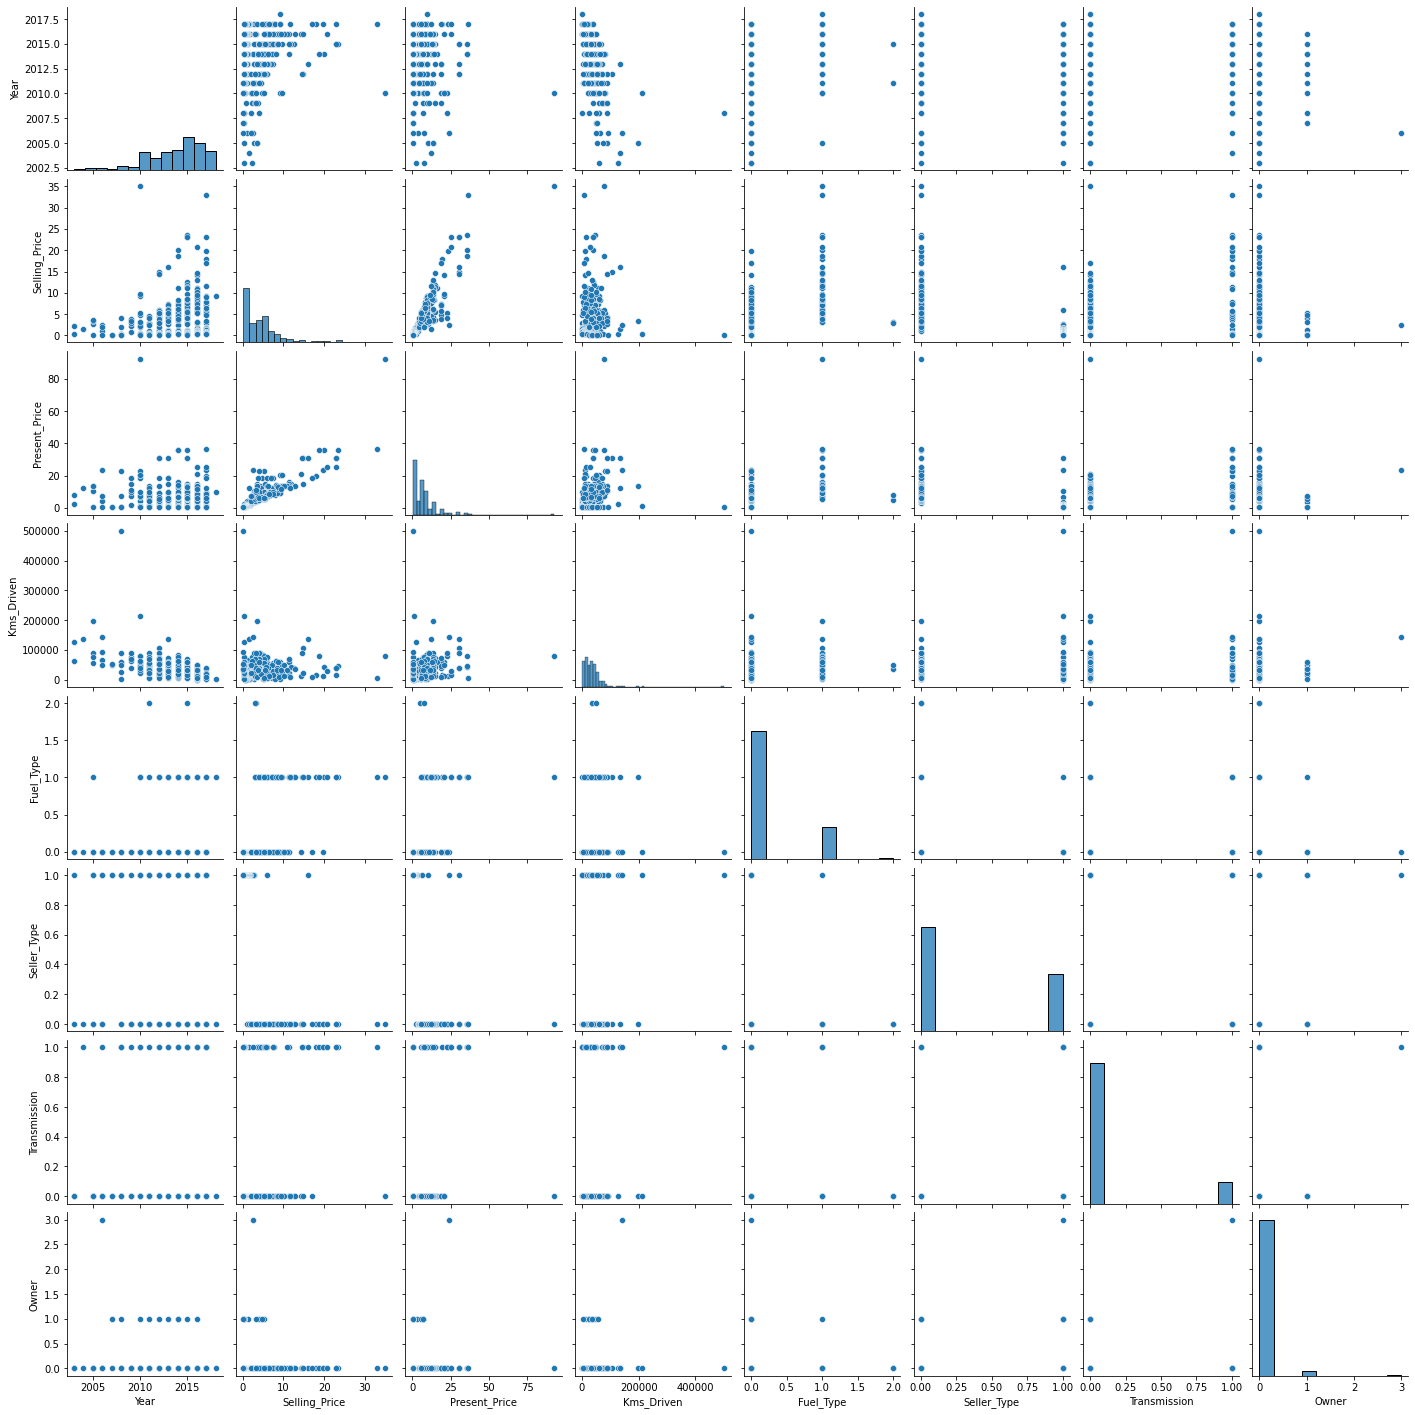

In [ ]:
plt.figure(figsize = (20,20))
sb.pairplot(dataset)
plt.show()

Heatmap 

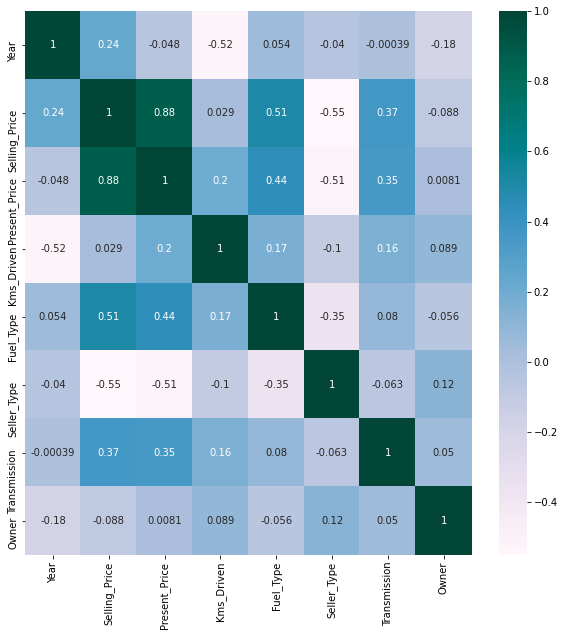

In [ ]:
plt.figure(figsize = (10,10))
sb.heatmap(dataset.corr(), annot = True ,cmap = 'PuBuGn')
plt.show()


In [ ]:
|#Checking the dataset shape
dataset.shape

(301, 9)

In [ ]:
#Checking for missed values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Analyzing our Parameters

In [ ]:
#Brief Description of the parameters
print("Were petrol cars sold more, or diesel?")
print(dataset.Fuel_Type.value_counts())
print("Petrol cars are being sold the most, followed by diesel cars, and CNG at the last")
print("-------------------------------")
print("Were cars with Manual or Automatic sold more?")
print(dataset.Transmission.value_counts())
print("Cars with Manual Transmission are being sold more, followed by cars with Automatic Transmission")
print("-------------------------------")
print("Is the car being sold by a car dealer or a non-dealer i.e, an individual")
print(dataset.Seller_Type.value_counts())
print("More cars have been sold through dealerships than non-dealerships i.e individuals")

Were petrol cars sold more, or diesel?
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Petrol cars are being sold the most, followed by diesel cars, and CNG at the last
-------------------------------
Were cars with Manual or Automatic sold more?
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Cars with Manual Transmission are being sold more, followed by cars with Automatic Transmission
-------------------------------
Is the car being sold by a car dealer or a non-dealer i.e, an individual
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
More cars have been sold through dealerships than non-dealerships i.e individuals


In [ ]:
print(dataset["Selling_Price"].groupby(dataset['Fuel_Type']).mean().sort_values(ascending=False))
print('Diesel Cars, on an average, cost more than their Petrol counterparts. The reason might be, that the rate of diesel would be less than the rate of petrol, hence it can be a factor of saving more money in the long run, which has a high chance of covering up the fuel costs')

Fuel_Type
Diesel    10.278500
Petrol     3.264184
CNG        3.100000
Name: Selling_Price, dtype: float64
Diesel Cars, on an average, cost more than their Petrol counterparts. The reason might be, that the rate of diesel would be less than the rate of petrol, hence it can be a factor of saving more money in the long run, which has a high chance of covering up the fuel costs


In [ ]:
print(dataset["Selling_Price"].groupby(dataset["Transmission"]).mean().sort_values(ascending=False))
print("Vehicles with an automatic transmission, tend to have a higher price, as compared to the vehicles with manual transmission, on an average")

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64
Vehicles with an automatic transmission, tend to have a higher price, as compared to the vehicles with manual transmission, on an average


In [ ]:
print(dataset["Selling_Price"].groupby(dataset["Owner"]).mean().sort_values(ascending=False))
print("In this dataset, most of the cars have had 0 owners, and in the practical world, cars with no prior owner would cost more than used cars. An exception can be spotted here i.e, the car with 3 past owner(s), has a higher average value than the car with 1 past owner(s)...although it is vice-versa for most of the time in majority of such scenarios")

Owner
0    4.761552
3    2.500000
1    1.970000
Name: Selling_Price, dtype: float64
In this dataset, most of the cars have had 0 owners, and in the practical world, cars with no prior owner would cost more than used cars. An exception can be spotted here i.e, the car with 3 past owner(s), has a higher average value than the car with 1 past owner(s)...although it is vice-versa for most of the time in majority of such scenarios


In [ ]:
print(dataset["Selling_Price"].groupby(dataset["Year"]).mean().sort_values(ascending=True))
print("The vehicles, which are comparitively new, would usualy turn out to cost more; this statement is consistent in some cases...in the other cases in which it is not consistent, we can infer that other factors must be contributing towards this, such as the brand of the vehicle")

Year
2007    0.160000
2008    1.002857
2003    1.300000
2006    1.437500
2004    1.500000
2011    2.375263
2005    2.487500
2009    2.816667
2013    3.540909
2012    3.841304
2014    4.762105
2016    5.213200
2010    5.262667
2015    5.927049
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64
The vehicles, which are comparitively new, would usualy turn out to cost more; this statement is consistent in some cases...in the other cases in which it is not consistent, we can infer that other factors must be contributing towards this, such as the brand of the vehicle


In [ ]:
print(dataset["Selling_Price"].groupby(dataset["Car_Name"]).mean().sort_values(ascending=True))
print("The cars which are considered under the premium category and/or it's seating capacity is high, would cost higher. Bikes, cost lower than cars, due to small engine capacity, seating, and other factors.")

Car_Name
Bajaj Discover 125      0.175000
Bajaj  ct 100           0.180000
Hero  CBZ Xtreme        0.200000
Hero Hunk               0.200000
Hero Super Splendor     0.200000
                         ...    
elantra                11.600000
creta                  11.800000
innova                 12.777778
fortuner               18.685455
land cruiser           35.000000
Name: Selling_Price, Length: 98, dtype: float64
The cars which are considered under the premium category and/or it's seating capacity is high, would cost higher. Bikes, cost lower than cars, due to small engine capacity, seating, and other factors.


In [ ]:
#Encoding the parametrical data
#Encoding Fuel Type
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#Encoding Transmission
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
#Encoding Seller Type
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
#checking the head of dataset to verify if the required parameters have been encoded or not
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Alteration

In [ ]:
#Removal of particular columns in the dataset
#We remove the selling price, from X and keep it in Y, and we remove the model of the car by using the .drop() method
X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = dataset['Selling_Price']

Splitting the dataset into train and test sets

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Training of our ML models - Linear Reg, and LogReg


Linear Regression


In [ ]:
LinearReg_Model = LinearRegression()
LinearReg_Model.fit(X_train,Y_train)
train_set_pred = LinearReg_Model.predict(X_train) #Training set predictions

Trying out R-Squared Error


In [ ]:
error_RSE = metrics.r2_score(Y_train,train_set_pred)
print("R-Squared Error: ", error_RSE)

R-Squared Error:  0.8838169193709795


Data Visualization


We first try plotting a scatterplot using the matplotlib.pyplot library

Text(0.5, 1.0, 'Linear Regression Test')

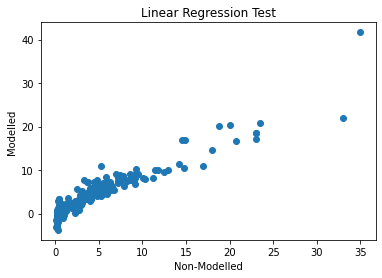

In [ ]:
plt.scatter(Y_train,train_set_pred)
plt.xlabel("Non-Modelled")
plt.ylabel("Modelled")
plt.title("Linear Regression Test")

Now, we analyze the test set which we have split from the orginal dataset

In [ ]:
test_set_pred = LinearReg_Model.predict(X_test)

In [ ]:
error_RSE = metrics.r2_score(Y_test,test_set_pred)
print("R-Squared Error: ", error_RSE)

R-Squared Error:  0.8401532365377693


Text(0.5, 1.0, 'Linear Regression Test')

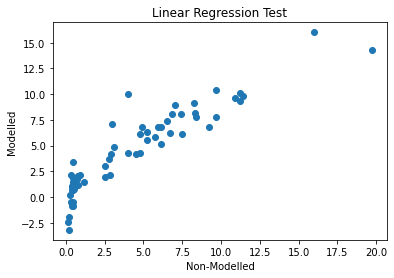

In [ ]:
plt.scatter(Y_test,test_set_pred)
plt.xlabel("Non-Modelled")
plt.ylabel("Modelled")
plt.title("Linear Regression Test")

Logistic Regression

In [ ]:
LogisticReg_Model = Lasso()
LogisticReg_Model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
train_set_pred_LogReg = LogisticReg_Model.predict(X_train) #Training set predictions


Trying out R-Squared Error


In [ ]:
error_RSE = metrics.r2_score(Y_train,train_set_pred_LogReg)
print("R-Squared Error: ", error_RSE)
#R-Squared<Mean Squared

R-Squared Error:  0.8435873952582825


Data Visualization


We first try plotting a scatterplot using the matplotlib.pyplot library

Text(0.5, 1.0, 'Logistic Regression Test')

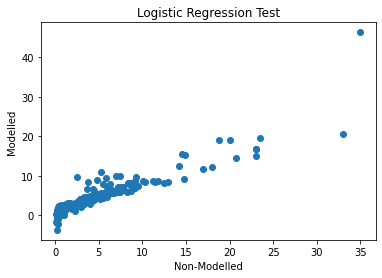

In [ ]:
plt.scatter(Y_train,train_set_pred_LogReg)
plt.xlabel("Non-Modelled")
plt.ylabel("Modelled")
plt.title("Logistic Regression Test")

Now, we analyze the test set which we have split from the orginal dataset

In [ ]:
test_set_pred_LogReg = LogisticReg_Model.predict(X_test)

In [ ]:
error_RSE = metrics.r2_score(Y_test,test_set_pred_LogReg)
print("R-Squared Error: ", error_RSE)

R-Squared Error:  0.8497457570738525


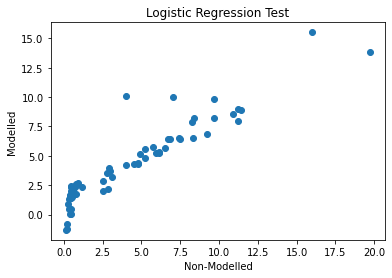

In [ ]:
plt.scatter(Y_test,test_set_pred_LogReg)
plt.xlabel("Non-Modelled")
plt.ylabel("Modelled")
plt.title("Logistic Regression Test")
plt.show()

In [ ]:
r2_acc = r2_score(Y_test,test_set_pred_LogReg)
print(r2_acc)

0.8497457570738525


We can say that both the models work moderately well, but the Linear Regression model works a tad bit better.
This ML model can still be optimized further, hence leaving room for a greater accuracy.